In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'consumer_external_interest_prob'
varied_param_legend_label = 'Consumer External Interest'
varied_param_x_label = 'Consumer External Interest'

In [5]:
num_influencers = 1
num_agents = 10

interests = [0, 0.5, 1, 5, 10, 50]
varied_param_values = interests

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=20,
    consumer_external_interest_prob=interests,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=40,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method='main',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
    delay_sensitivity=1
)

Optimizing consumer 0


Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.04650032598874532s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.10147755302023143s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.039077047986211255s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.024632877990370616s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.028710128011880443s): nit=3, nfev=10, njev=5.
Optimizing producer 5
Optimization succeeded (overall 0.03506851400015876s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimization succeeded (overall 0.03501329701975919s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succeeded (overall 0.08737993400

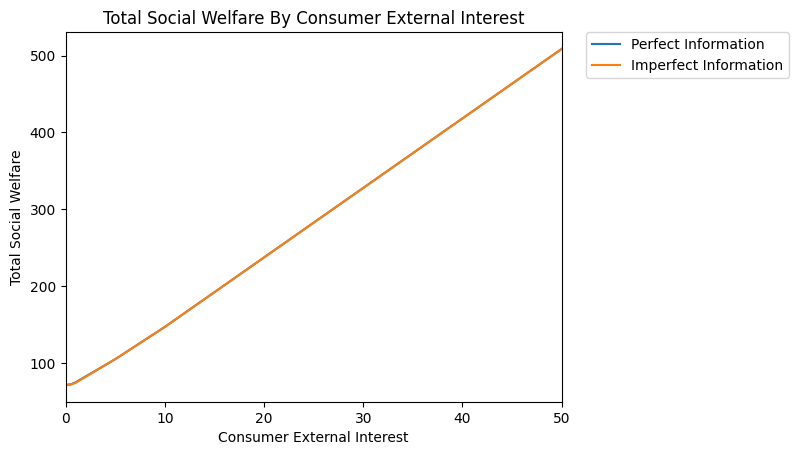

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

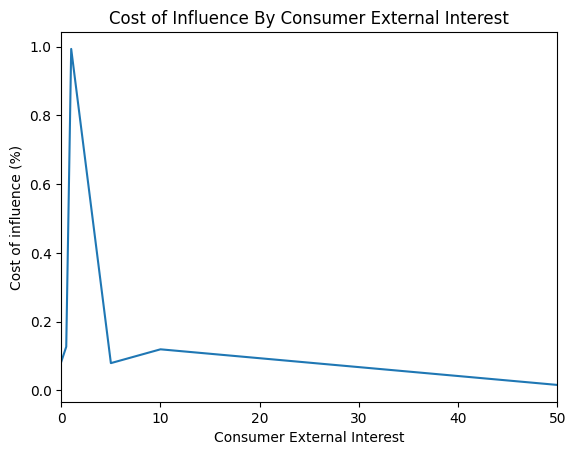

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

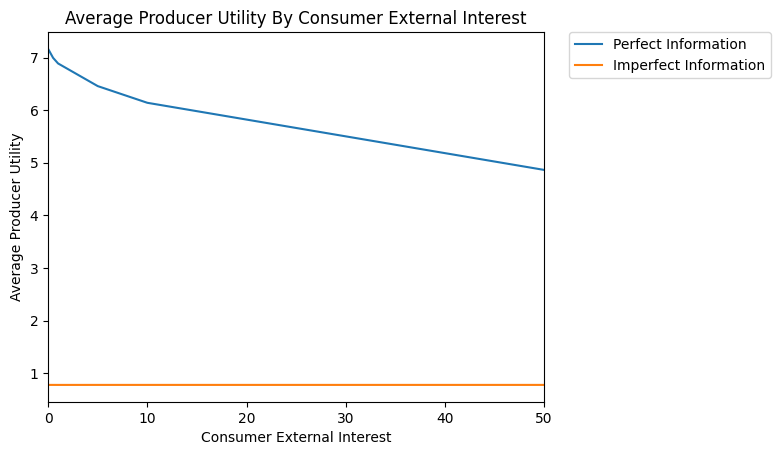

In [9]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

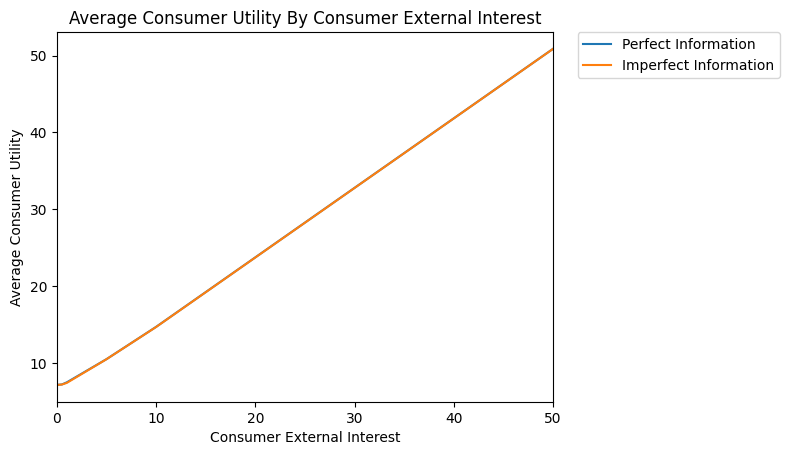

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

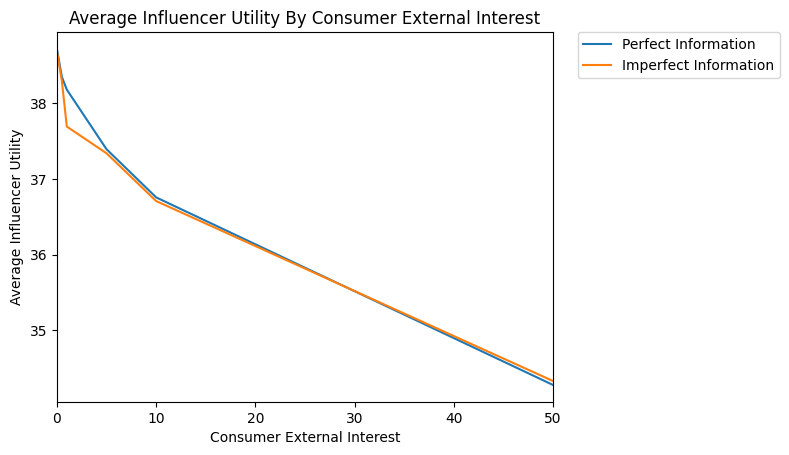

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

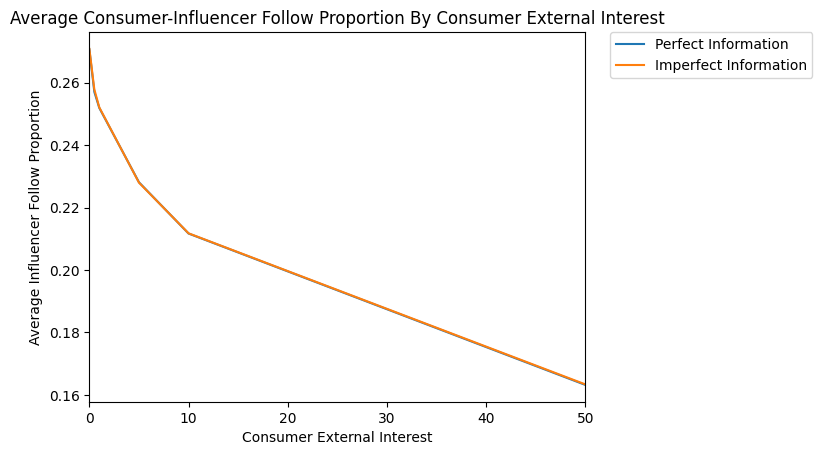

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

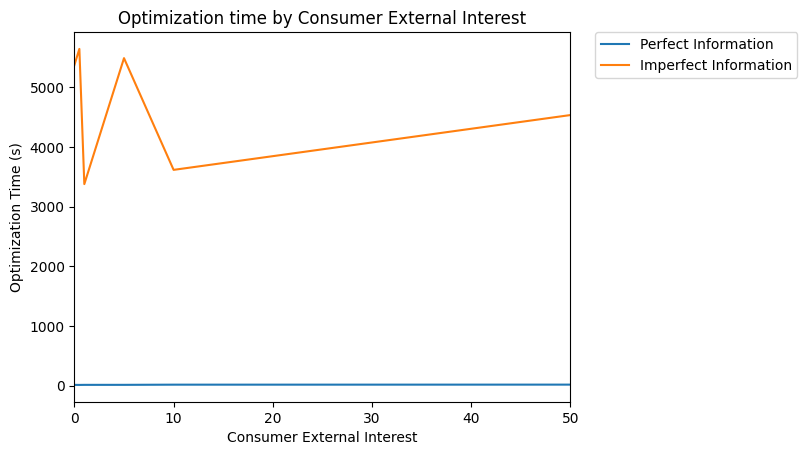

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

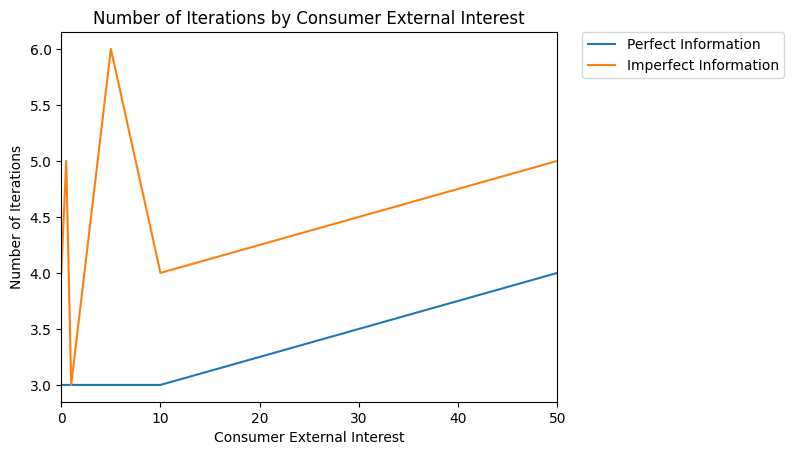

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

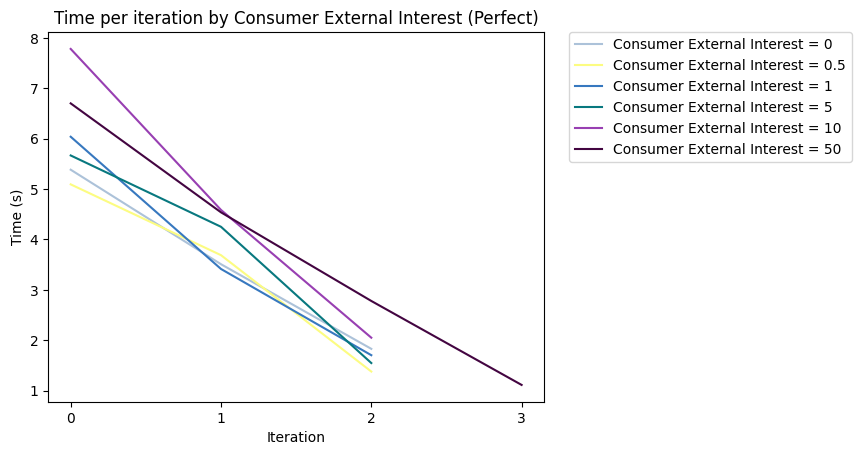

In [15]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

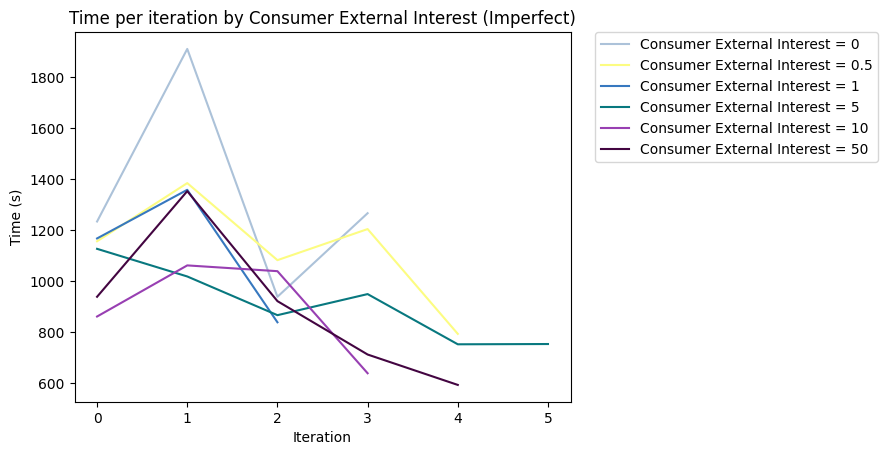

In [16]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

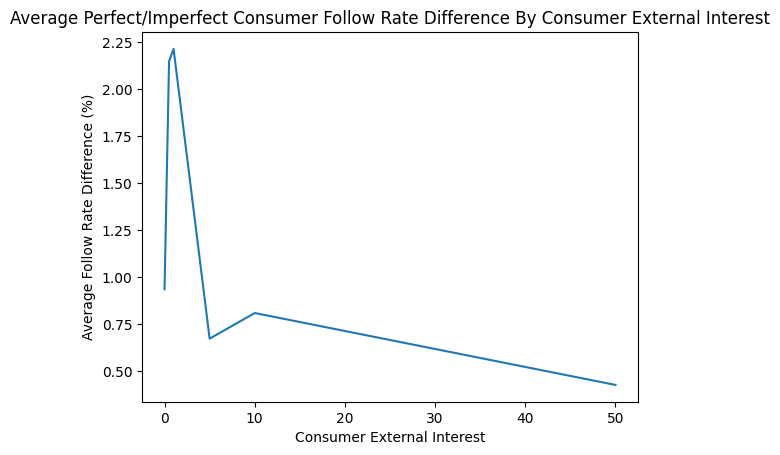

In [17]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1] + 1e-10) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

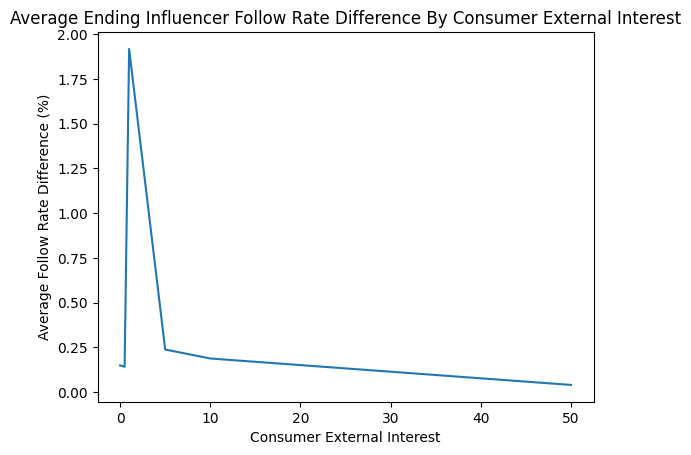

In [18]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

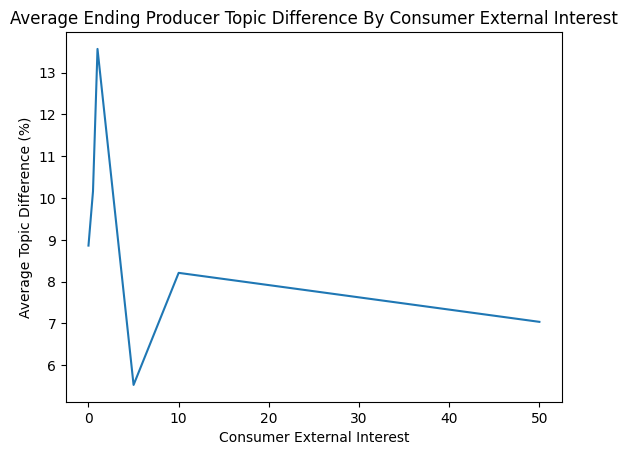

In [19]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
#plt.ylim(0, 10)
plt.show()

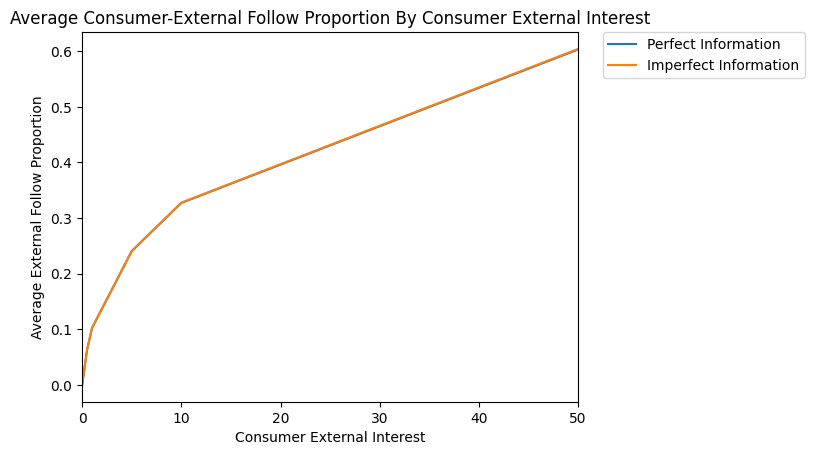

In [20]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

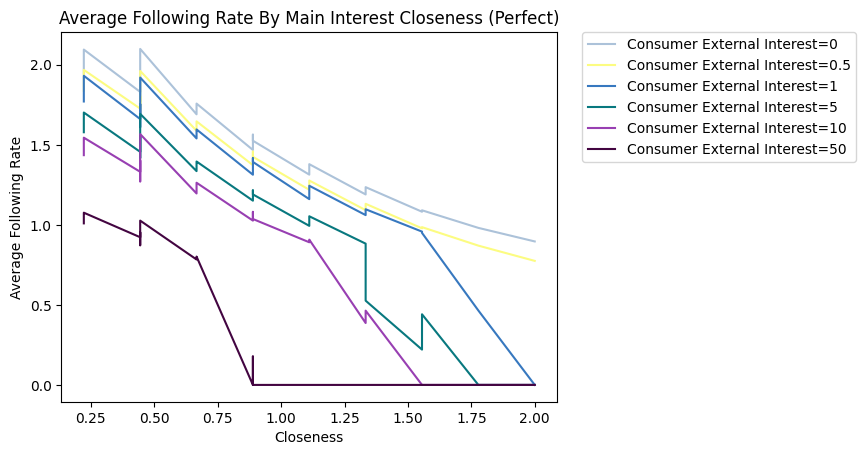

In [21]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

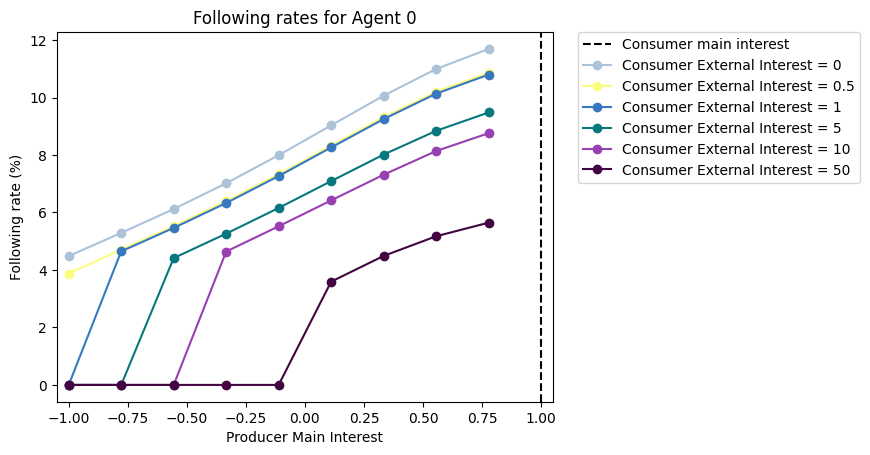

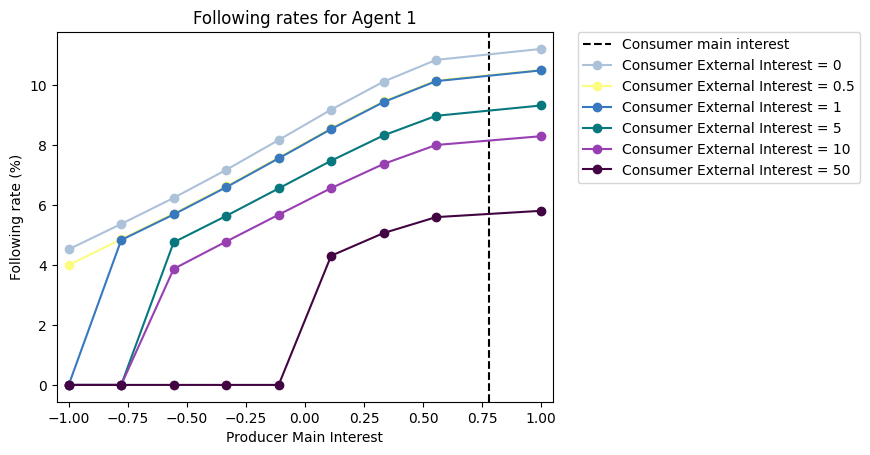

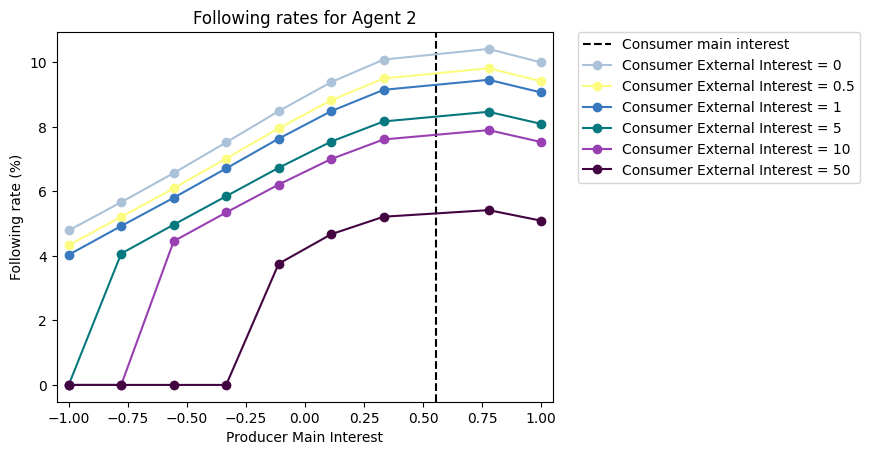

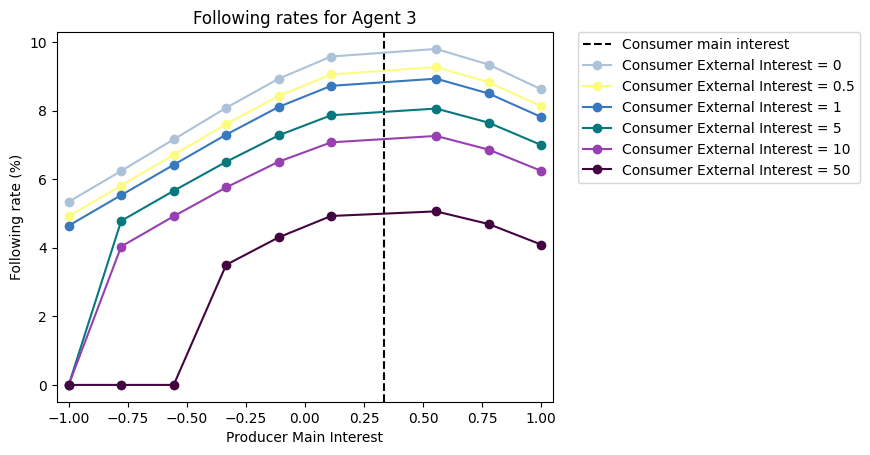

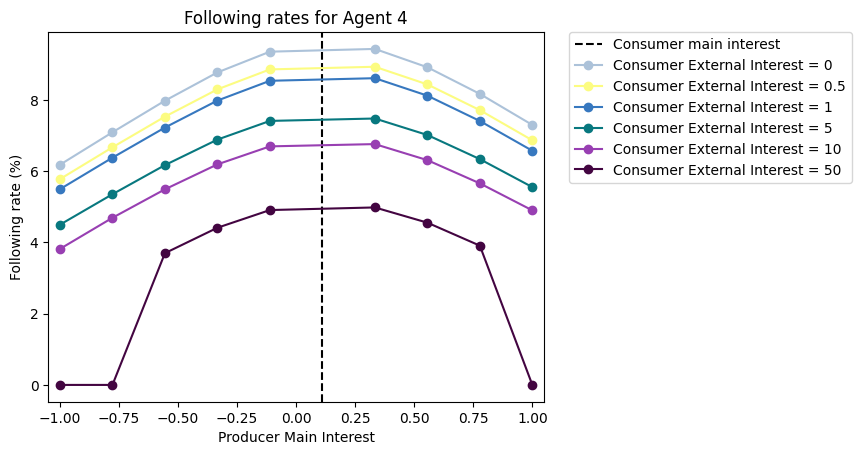

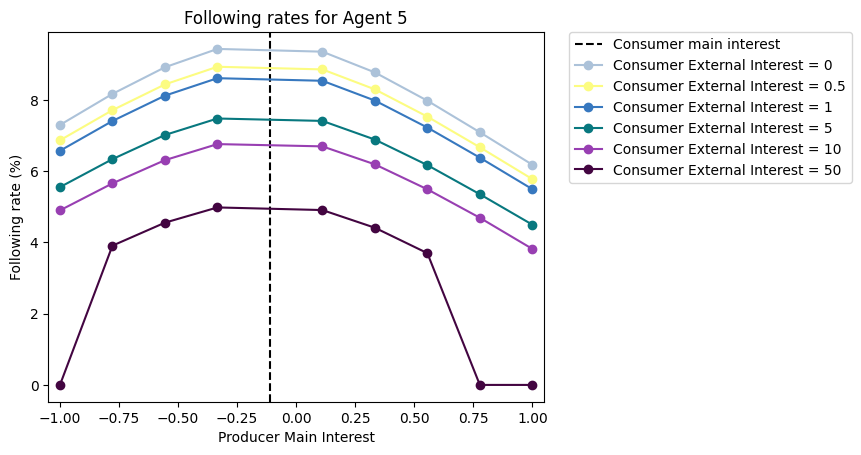

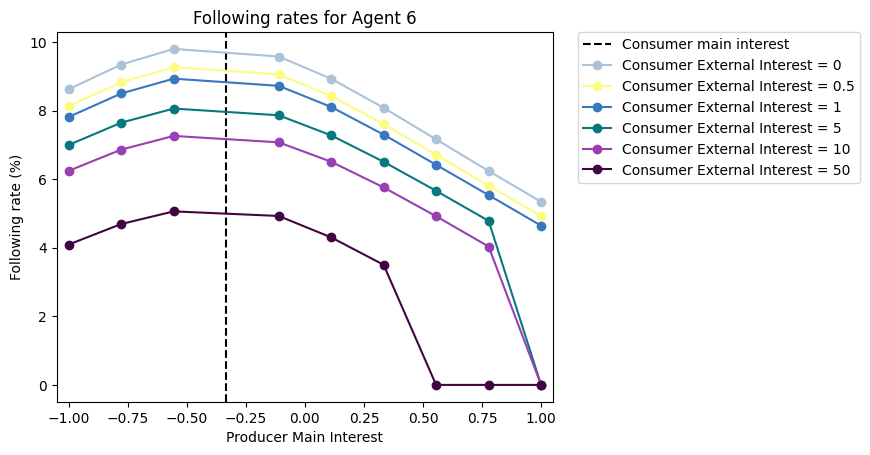

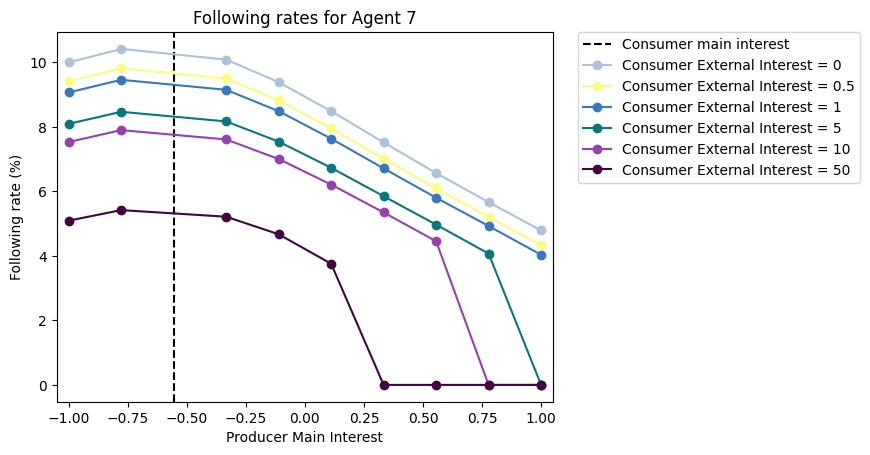

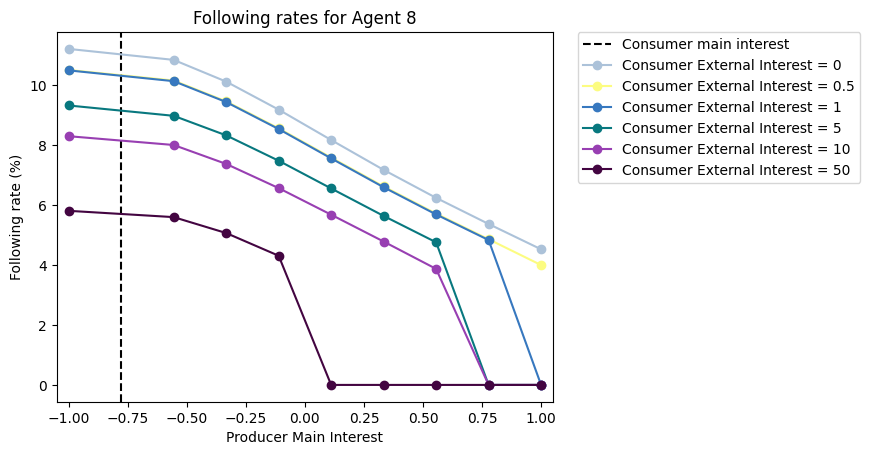

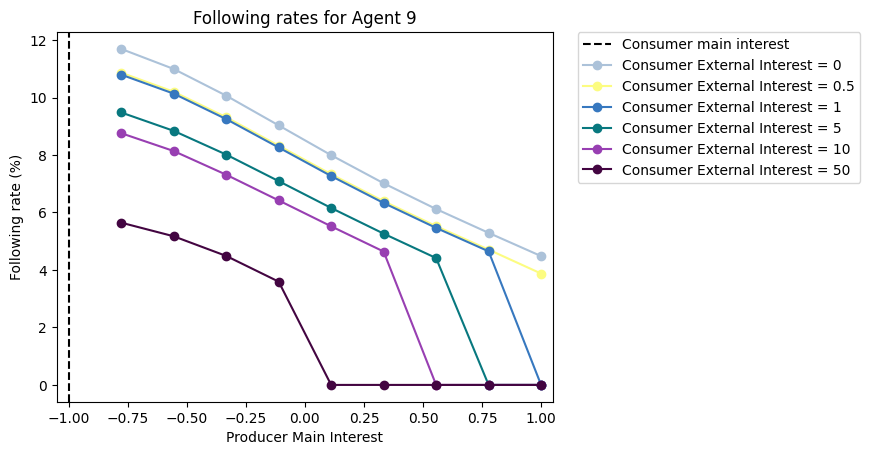

In [22]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

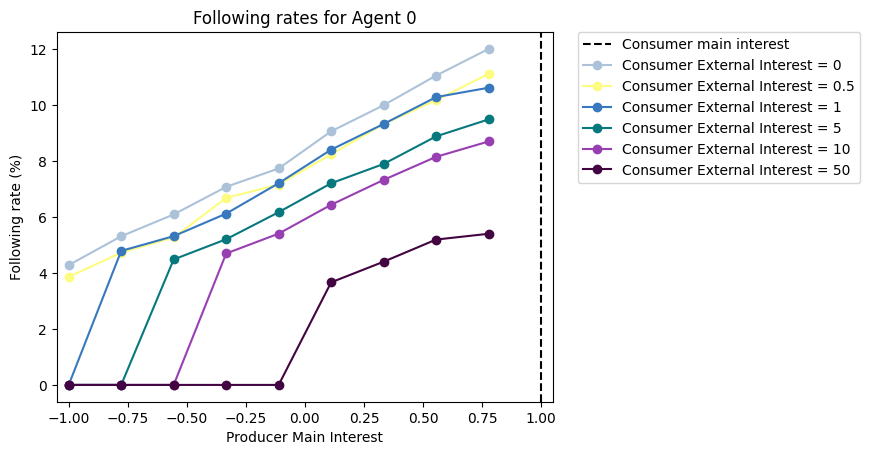

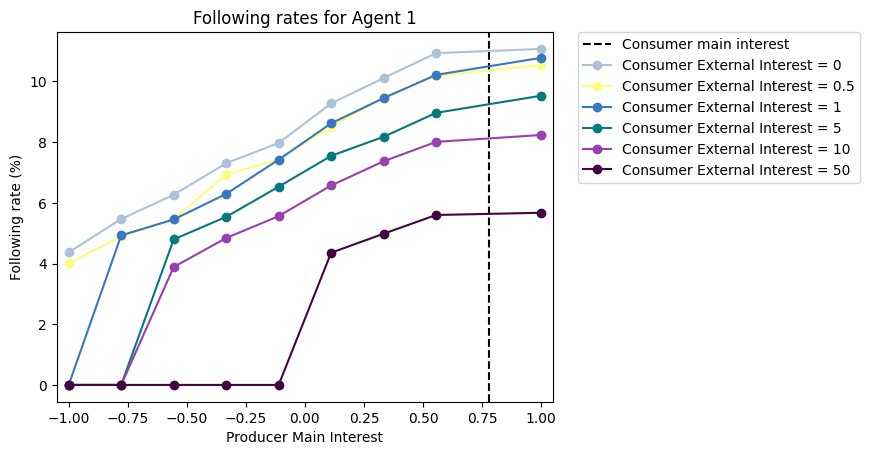

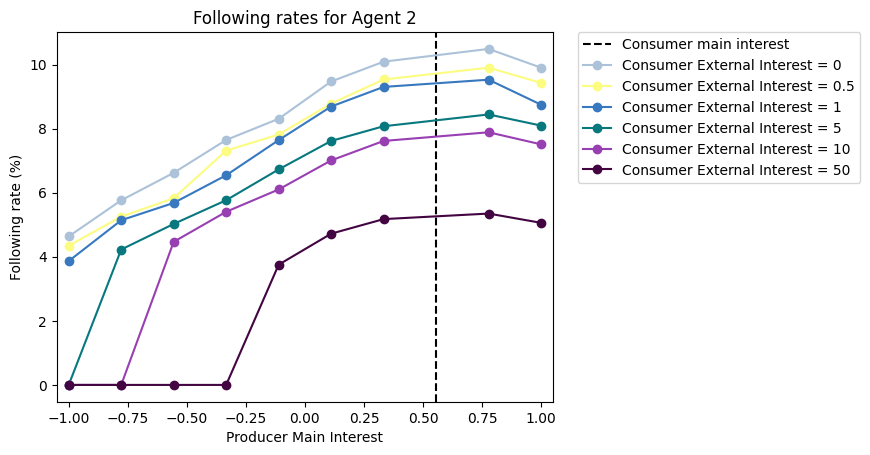

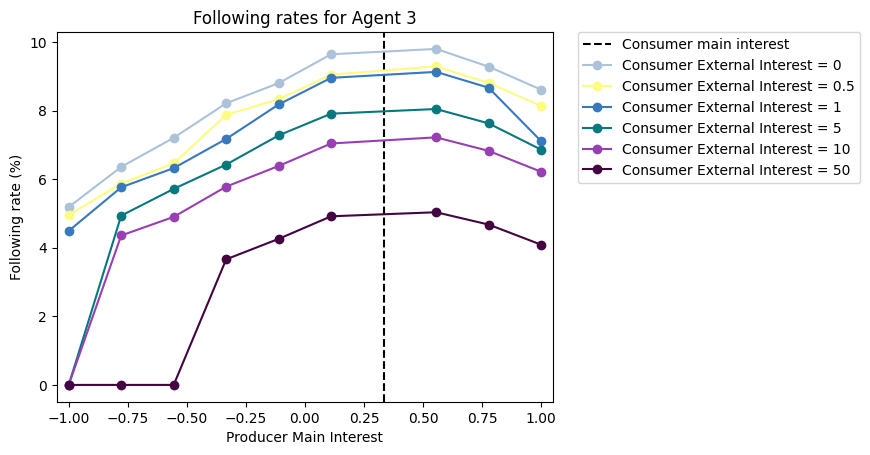

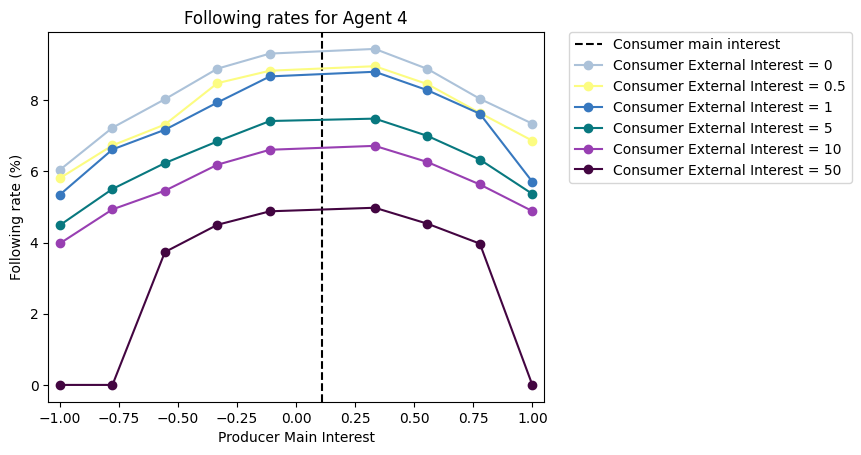

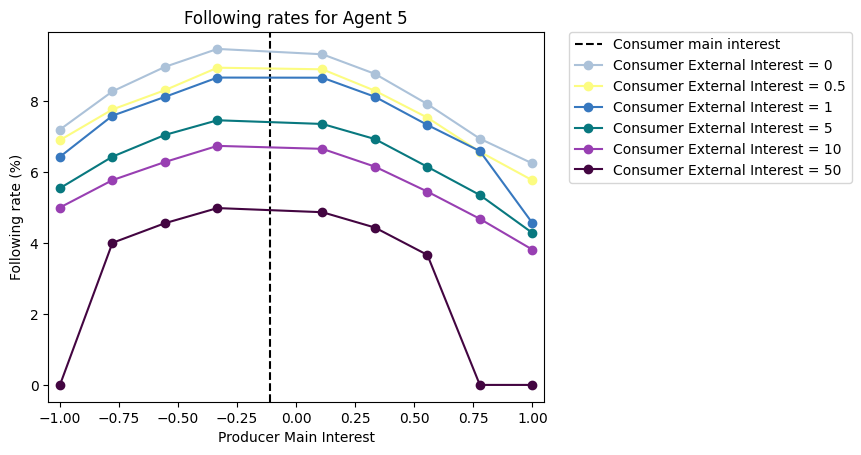

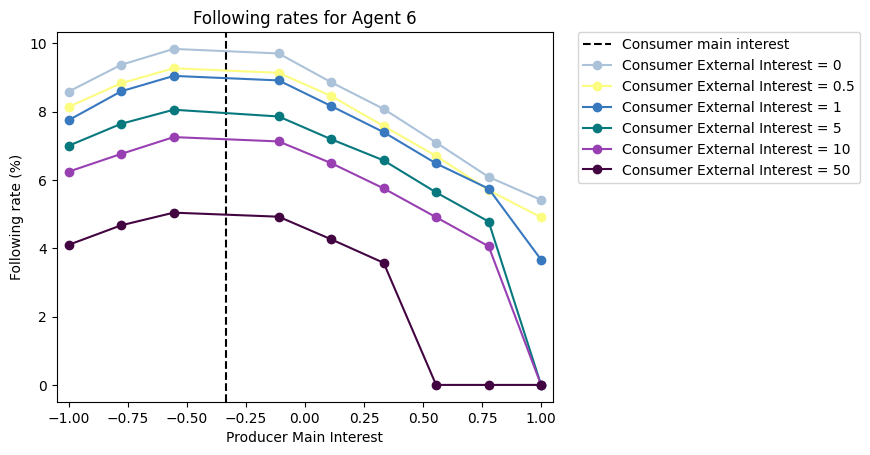

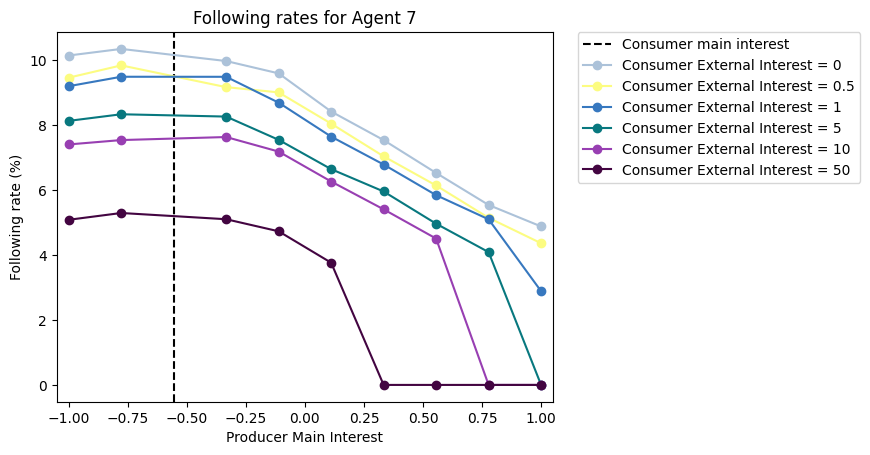

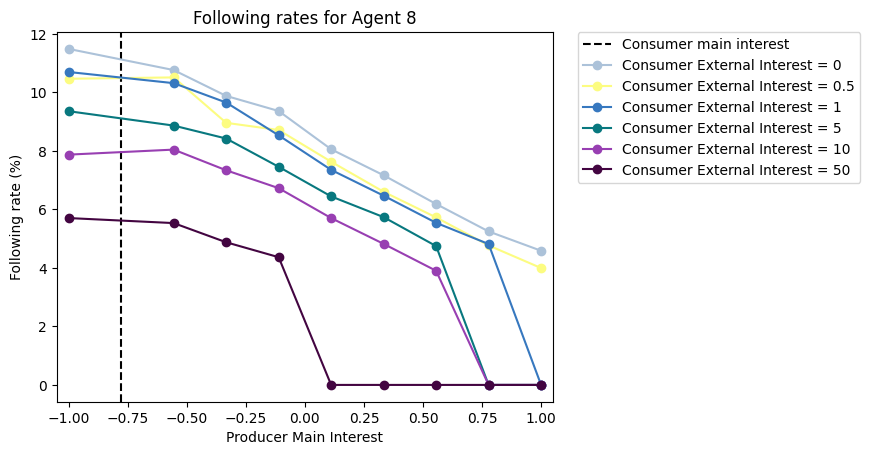

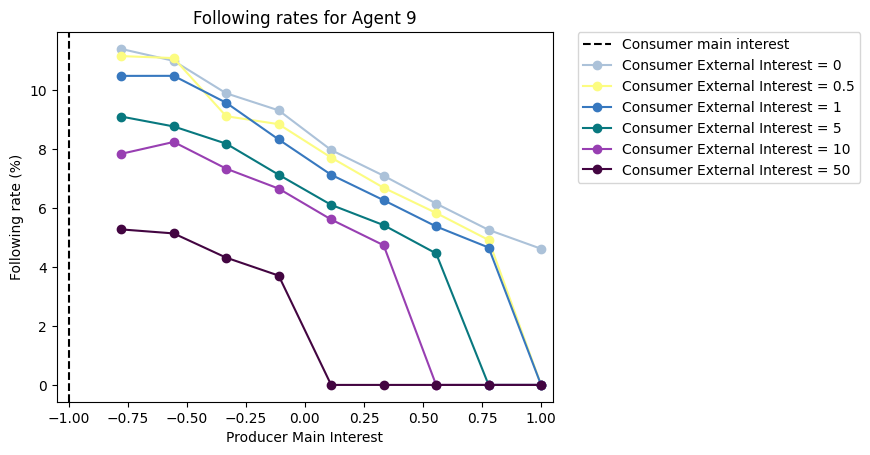

In [23]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

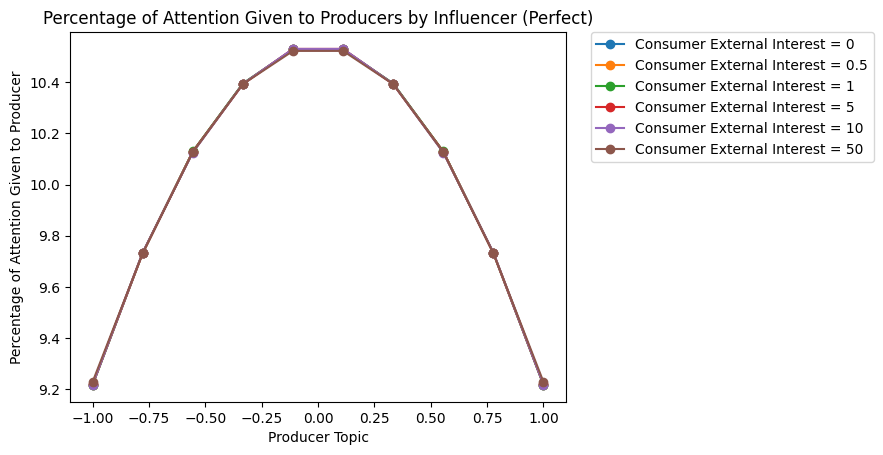

In [24]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

[3.6903941  3.8818288  4.05134053 4.16211268 4.21448549 4.21451533
 4.16108483 4.05499639 3.89433335 3.6749085  0.         0.        ]
[3.68807959 3.8881223  4.0544363  4.16122573 4.2159011  4.21375744
 4.15144484 4.03849877 3.89850007 3.69003386 0.         0.        ]
[3.4606834  3.92435881 4.08466356 4.193776   4.24711174 4.24566835
 4.17771658 4.06851717 3.92395485 3.67354955 0.         0.        ]
[3.65958668 3.89372086 4.0538377  4.162093   4.21511049 4.21733339
 4.15900365 4.05643599 3.89444658 3.68843166 0.         0.        ]
[3.6890508  3.89513529 4.0517086  4.16166156 4.21785789 4.21622469
 4.16177038 4.05236742 3.87335672 3.68086665 0.         0.        ]
[3.69262888 3.89474721 4.04708703 4.15805377 4.20763366 4.20799657
 4.15843264 4.05016631 3.89108209 3.69217184 0.         0.        ]


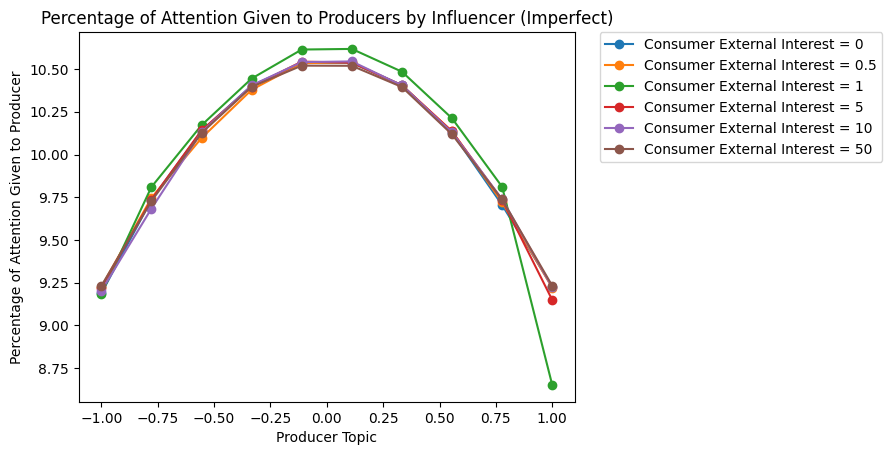

In [25]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(following_rates)
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [26]:
imperfect_info_stats[-4].influencer_stats[num_agents].following_rates[-1]

array([3.4606834 , 3.92435881, 4.08466356, 4.193776  , 4.24711174,
       4.24566835, 4.17771658, 4.06851717, 3.92395485, 3.67354955,
       0.        , 0.        ])

[3.68683115 3.89324809 4.05127178 4.15765386 4.21099182 4.2109904
 4.15765484 4.05127044 3.89325268 3.68683494] 0.1905097851978875
[3.6903941  3.8818288  4.05134053 4.16211268 4.21448549 4.21451533
 4.16108483 4.05499639 3.89433335 3.6749085 ] 0.19405677422861023
[3.68713073 3.89330558 4.05122797 4.15750369 4.21083212 4.21083142
 4.1575058  4.0512267  3.89330326 3.68713273] 0.19034312329189876
[3.68807959 3.8881223  4.0544363  4.16122573 4.2159011  4.21375744
 4.15144484 4.03849877 3.89850007 3.69003386] 0.1902294597316932
[3.68696436 3.89257678 4.05166031 4.15777923 4.21102138 4.21102075
 4.15777868 4.05166438 3.89257073 3.68696341] 0.19059123473330145
[3.4606834  3.92435881 4.08466356 4.193776   4.24711174 4.24566835
 4.17771658 4.06851717 3.92395485 3.67354955] 0.2472546755415991
[3.68773937 3.89242574 4.05123485 4.15675236 4.21184881 4.21184797
 4.15674887 4.0512327  3.8924269  3.68774244] 0.19034349639657674
[3.65958668 3.89372086 4.0538377  4.162093   4.21511049 4.21733339
 4.159

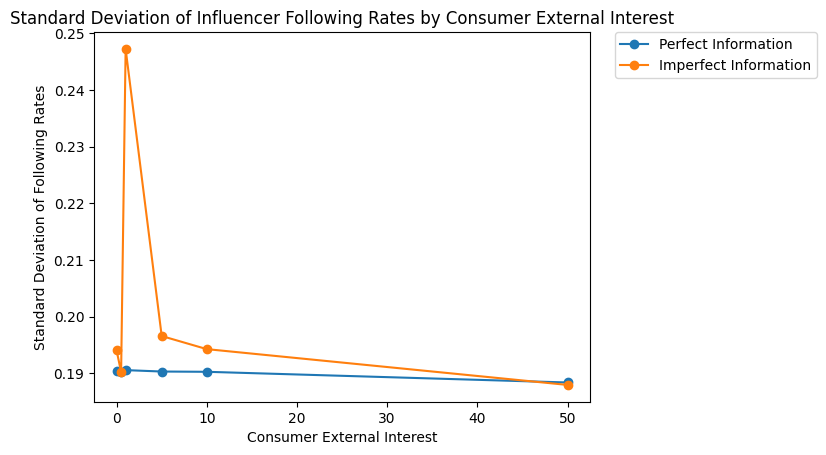

In [27]:
perfect_following_rate_std_devs = []
imperfect_following_rate_std_devs = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perfect_following_rates = perfect_influencer_stat.following_rates[-1][:num_agents]
    perfect_following_rates_std_dev = np.std(perfect_following_rates)
    print(perfect_following_rates, perfect_following_rates_std_dev)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperfect_following_rates = imperfect_influencer_stat.following_rates[-1][:num_agents]
    imperfect_following_rates_std_dev = np.std(imperfect_following_rates)
    print(imperfect_following_rates, imperfect_following_rates_std_dev)

    perfect_following_rate_std_devs.append(perfect_following_rates_std_dev)
    imperfect_following_rate_std_devs.append(imperfect_following_rates_std_dev)

plt.figure()
plt.title(f"Standard Deviation of Influencer Following Rates by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Standard Deviation of Following Rates")
plt.plot(varied_param_values, perfect_following_rate_std_devs, label="Perfect Information", marker='o')
plt.plot(varied_param_values, imperfect_following_rate_std_devs, label="Imperfect Information", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

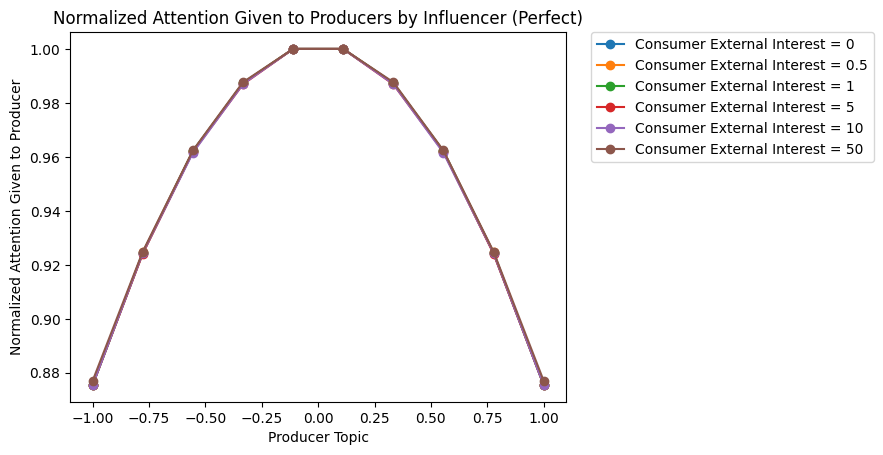

In [28]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

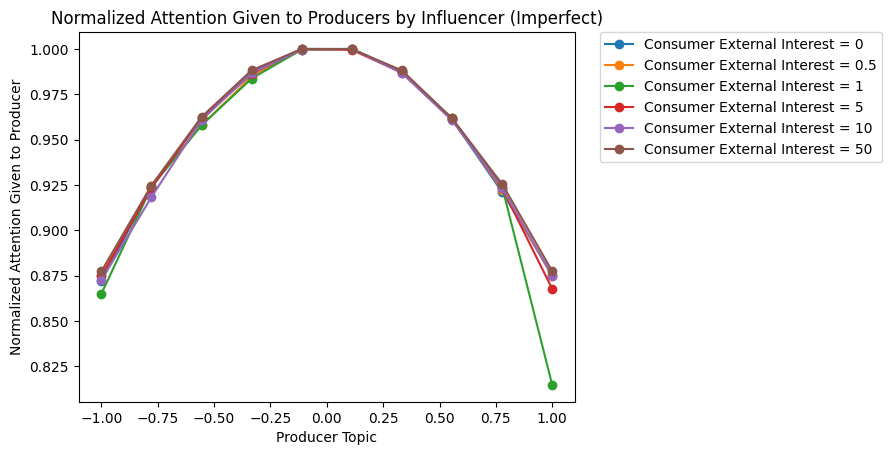

In [29]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

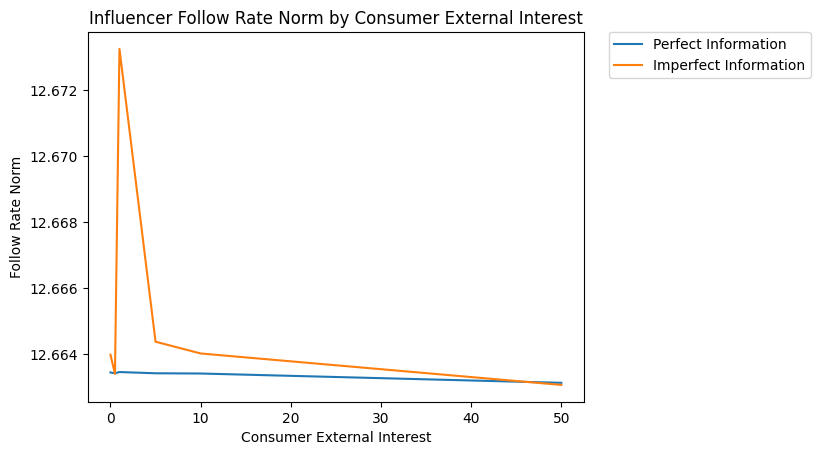

In [30]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

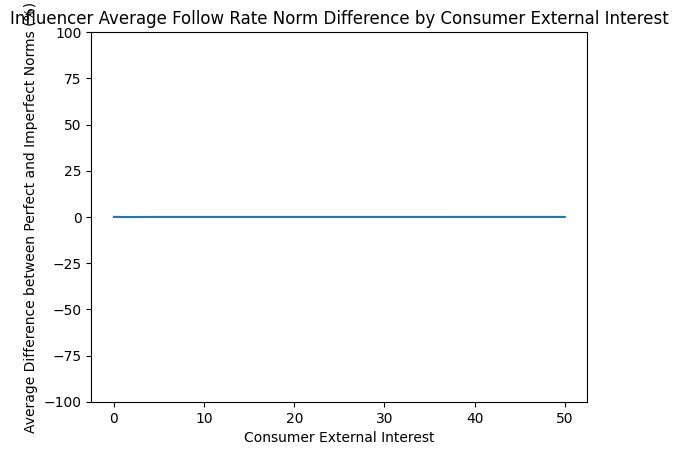

In [31]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

0.9999988888903498
0.9999990012341704
0.9998166468937288
0.9999971751305824
0.9999982384919257
0.9999999196432073


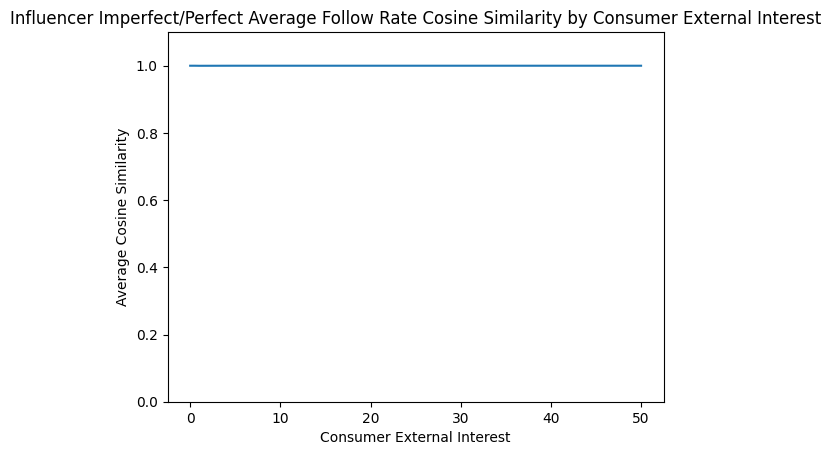

In [32]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
    cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    cosine_similarities.append(cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

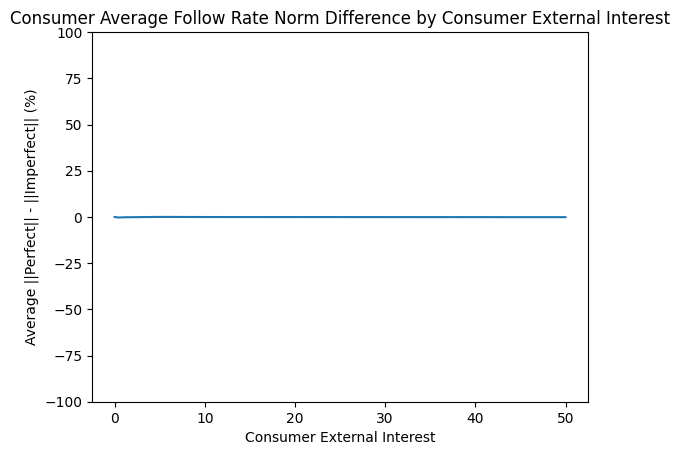

In [33]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-100, 100)
plt.show()

[0.9999539911095795, 0.9993175689599184, 0.999725633819837, 0.9999753963130283, 0.9999531654990689, 0.9999929017345567]


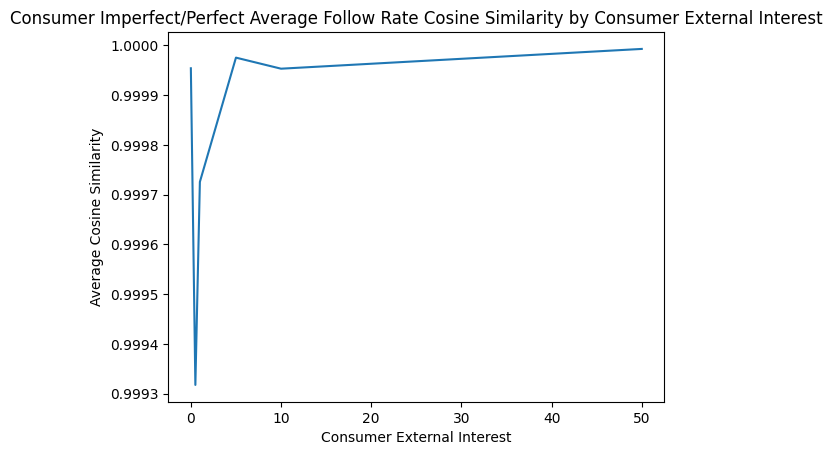

In [34]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
print(cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.show()

In [35]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 71.55318709639906, 71.62969121803496, 71.6311166784072], 'total_producer_utility': [0, 71.55318709639907, 71.62969121803496, 71.63111667840718], 'total_influencer_utility': [0, 38.76650392874007, 38.71071022596022, 38.71605595047579], 'total_social_welfare': [0, 71.55318709639906, 71.62969121803496, 71.6311166784072], 'average_consumer_rate_change': [0, 4.351149436485114, 0.33402486358174804, 0.0315024732758588], 'average_producer_topic_change': [0, 0.16467731941185304, 0.014864183421255683, 0.0034095081138064602], 'average_influencer_rate_change': [0, 0.9122810179723841, 0.30986588422907746, 0.0], 'average_consumer_utility_change': [0, 7.1553187096399045, 0.007650412163590659, 0.00014254603722303473], 'average_producer_utility_change': [0, 7.155318709639905, 0.007650412163589859, 0.00014254603722365644], 'average_influencer_utility_change': [0, 38.76650392874007, -0.05579370277985163, 0.0053457245155712485], 'consumer_stats': {0: {'u

In [36]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 4, 'total_consumer_utility': [0, 70.34168534666243, 70.77975944025083, 71.50497635656416, 71.5715577611415], 'total_producer_utility': [0, 7.780720897508429, 7.781043702620581, 7.783895596635176, 7.783961711444544], 'total_influencer_utility': [0, 37.9629840077999, 38.2359520126612, 38.667496600969734, 38.68645551838962], 'total_social_welfare': [0, 70.34168534666243, 70.77975944025083, 71.50497635656416, 71.5715577611415], 'average_consumer_rate_change': [0, 4.351149436485114, 0.18227354721006533, 0.18065076854045237, 0.16739458721713094], 'average_producer_topic_change': [0, 0.0576487660662907, 0.041001769164157285, 0.0444477661060829, 0.01137253415821016], 'average_influencer_rate_change': [0, 0.9122810179723841, 0.2197676116344967, 0.132516290233123, 0.24359531710486765], 'average_consumer_utility_change': [0, 7.034168534666243, 0.04380740935883933, 0.07252169163133493, 0.006658140457733719], 'average_producer_utility_change': [0, 0.7780720897508429, 3.2280511215